## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
link = 'https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv'

df = pd.read_csv(link)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

#### Поиск пропусков в данных

In [3]:
df.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**Замечание:** пропусков в таблице нет.

---

#### Разделение признаков на количественные, бинарные, порядковые и номинальные

**Количественные** — числовой признак, указывающий на количество чего-то. (возраст, доход семьи, стаж работы и т.д.)

**Номинальные** — категориальный признак, к которому мы не можем применять математические операции.

**Бинарные** — то же самое, что и номинальные, только с двумя категориями.

**Порядковые** — то же самое, что и номинальные, но есть возможность определить порядок.

In [4]:
df.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

1. status — порядковый
1. duration — количественный
1. credit_history — номинальный
1. purpose — номинальный
1. amount — количественный
1. savings — порядковый
1. employment_duration — порядковый
1. installment_rate — порядковый
1. personal_status_sex — номинальный
1. other_debtors — номинальный
1. present_residence — порядковый
1. property — номинальный
1. age — количественный
1. other_installment_plans — номинальный
1. housing — номинальный
1. number_credits — номинальный
1. job — номинальный
1. people_liable — порядковый
1. telephone — бинарный
1. foreign_worker — бинарный
1. credit_risk — бинарный

In [5]:
df_cols = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
          'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property',
          'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable',
          'telephone', 'foreign_worker', 'credit_risk']
df[df_cols] = df[df_cols].astype('category')

In [6]:
df.dtypes

status                     category
duration                      int64
credit_history             category
purpose                    category
amount                        int64
savings                    category
employment_duration        category
installment_rate           category
personal_status_sex        category
other_debtors              category
present_residence          category
property                   category
age                           int64
other_installment_plans    category
housing                    category
number_credits             category
job                        category
people_liable              category
telephone                  category
foreign_worker             category
credit_risk                category
dtype: object

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
df.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

Процент клиентов моложе 30 лет, которые снимают жильё:

In [8]:
age = 30
len(df[(df['age'] < age) & (df['housing'] == 'rent')]) / len(df[df['age'] < age])

0.6666666666666666

Процент клиентов старше 40 лет, которые снимают жильё:

In [9]:
age = 40
len(df[(df['age'] > age) & (df['housing'] == 'rent')]) / len(df[df['age'] > age])

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
len(df[(df['foreign_worker'] == 'yes')
       & (df['number_credits'] != '1')
       & (df['number_credits'] != '3-Feb')])

12

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [12]:
x = np.arange(-np.pi, np.pi, (2 * np.pi) / 100)

y1 = np.sin(x)
y2 = np.cos(x)

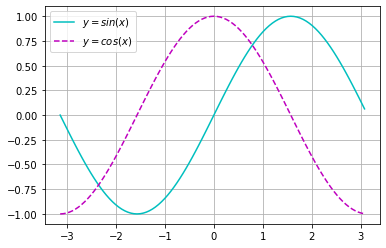

In [13]:
plt.plot(x, y1, '-c', label='$y=sin(x)$')
plt.plot(x, y2, '--m', label='$y=cos(x)$')

# plt.xlabel("x axis caption")
# plt.ylabel("y axis caption")
plt.legend()
plt.grid(True)

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

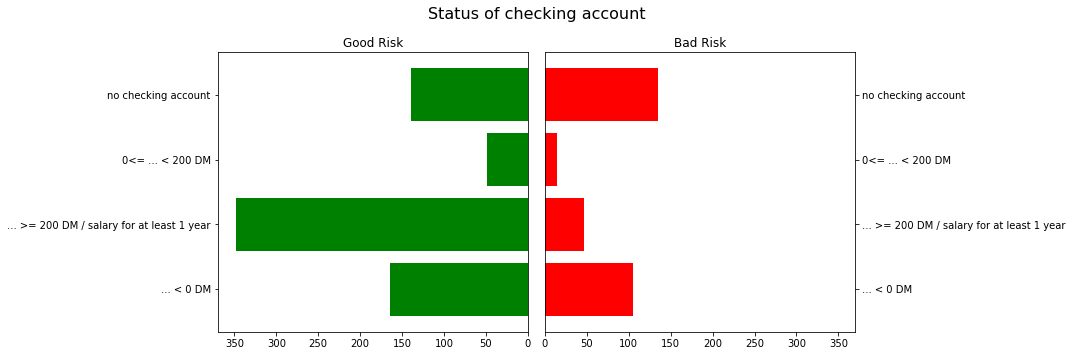

In [14]:
plt.subplot(1, 2, 1)
ax = df[df['credit_risk'] == 'good'].groupby(['status']).size() \
        .plot(color='g',
              kind='barh',
              title='Good Risk',
              width=0.82,
              figsize=(15, 5),
              legend=False)
plt.ylabel('')
ax.set_xlim(0, 370)
ax.invert_xaxis()

plt.subplot(1, 2, 2)
ax = df[df['credit_risk'] == 'bad'].groupby(['status']).size() \
        .plot(color='r',
            kind='barh',
            title='Bad Risk',
            width=0.82,
            figsize=(15, 5),
            legend=False)
ax.yaxis.tick_right()
plt.ylabel('')
ax.set_xlim(0, 370)

plt.suptitle('Status of checking account', size=16)
plt.tight_layout()
plt.show()

### Задание 8  (0.5 балла)

In [15]:
import seaborn as sns

In [16]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.35)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

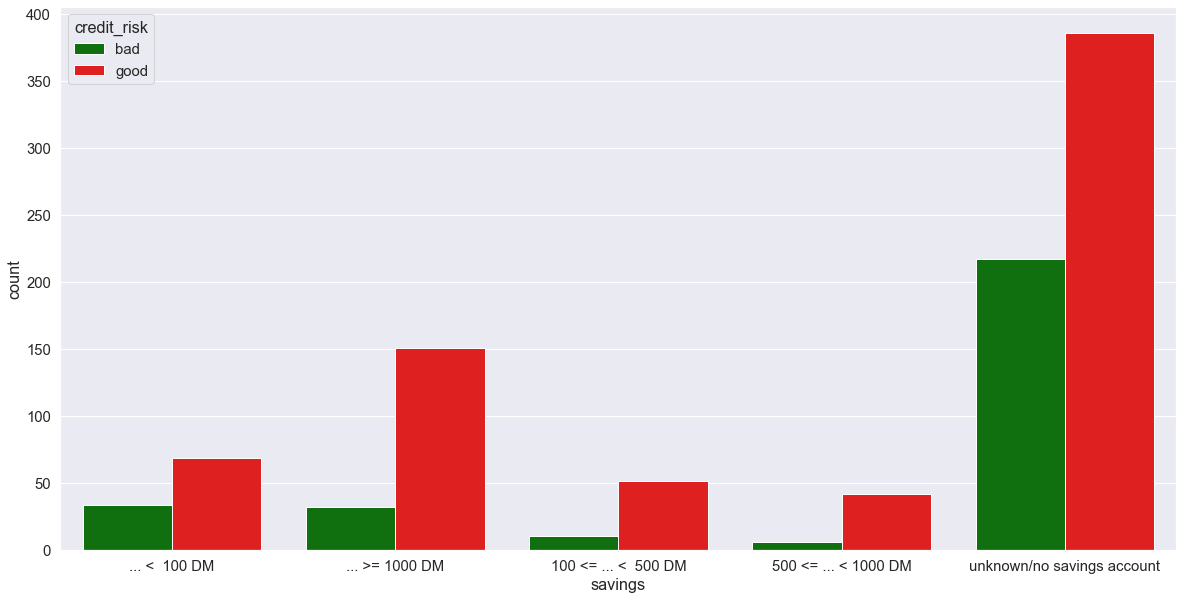

In [17]:
sns.countplot(x=df['savings'], hue=df['credit_risk'], palette=['green', 'red'])

plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

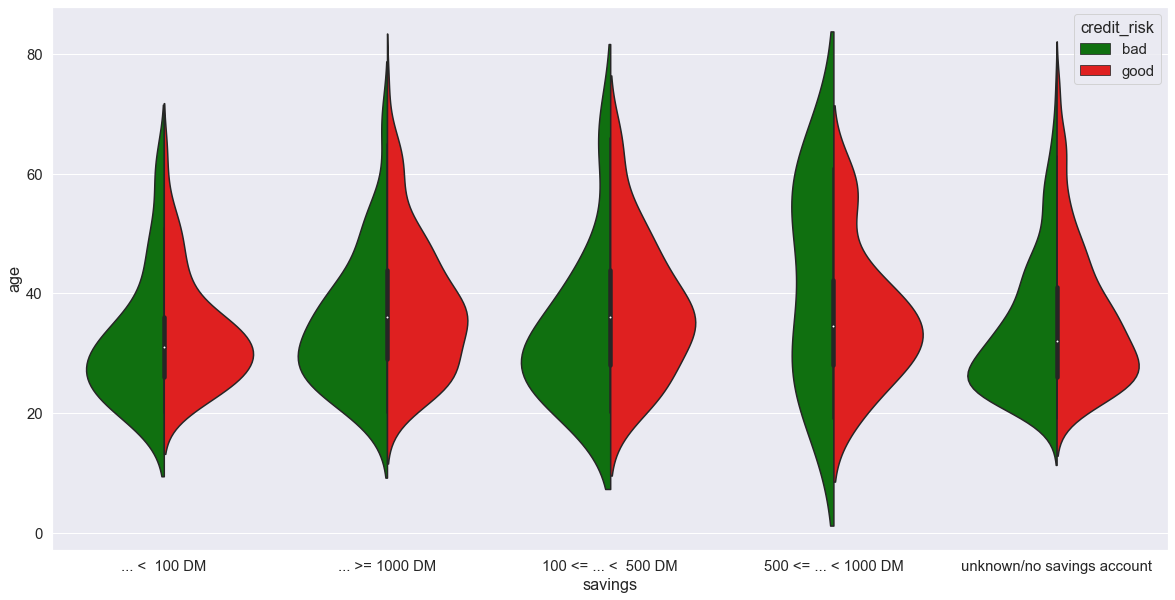

In [18]:
sns.violinplot(x='savings', y='age', hue='credit_risk', data=df, palette=['green', 'red'], split=True)

plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [19]:
df['age_bin'] = pd.cut(df['age'].astype(int), 10)

common_df = df.copy()
common_df['credit_risk'] = 'overall'

<ipython-input-20-f7244ca03b31>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.catplot(data=pd.concat([df, common_df])[df.age.notnull()], x="age_bin", hue="credit_risk", row="credit_risk",


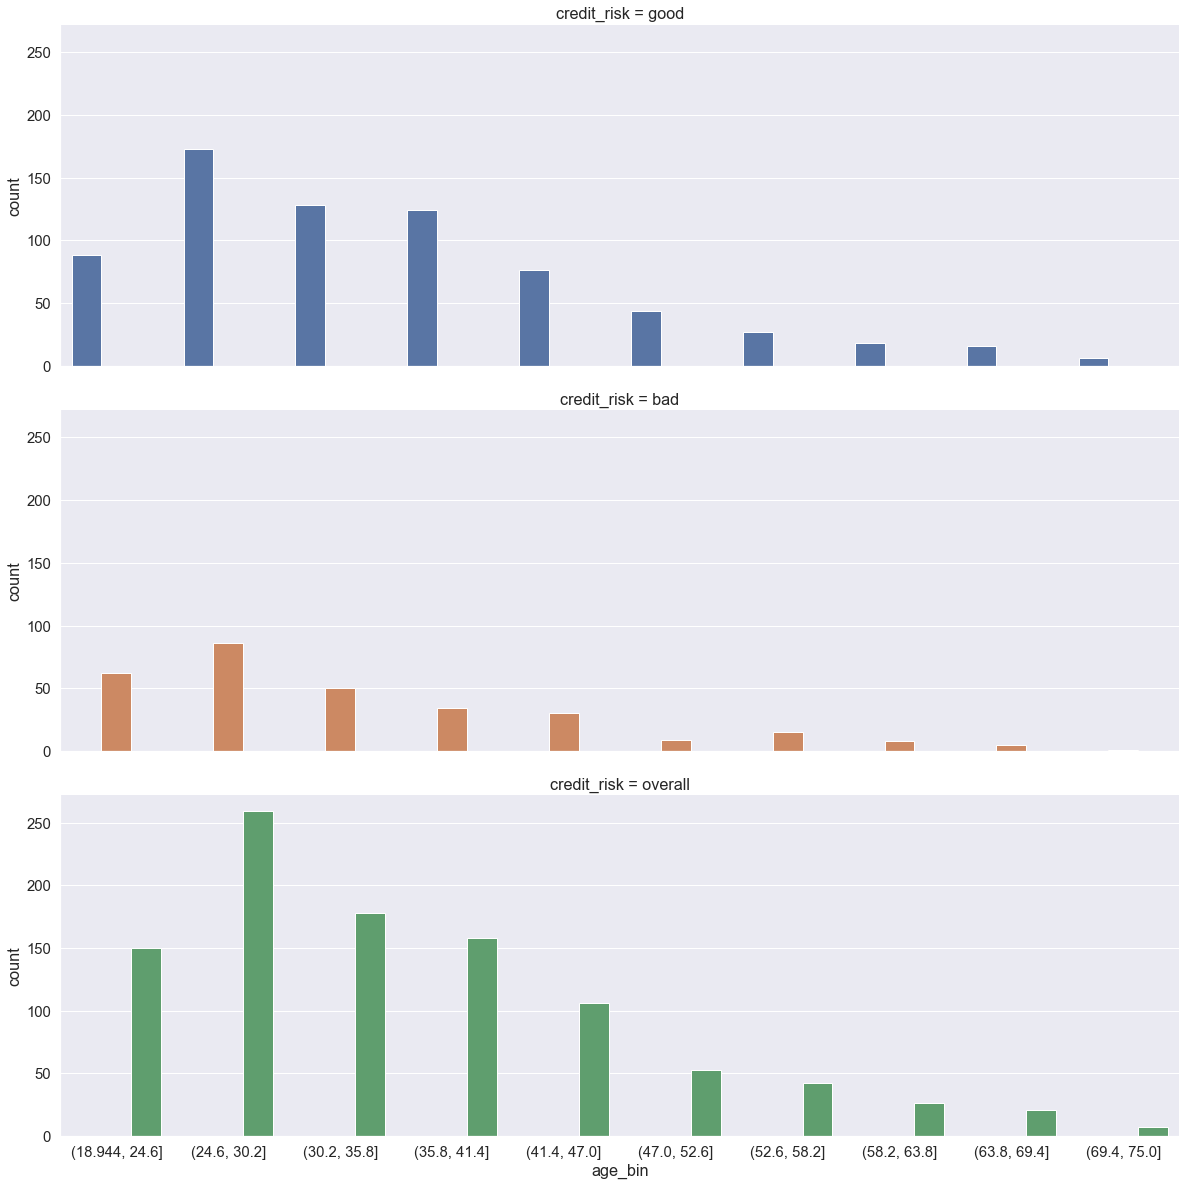

In [20]:
# Здесь я добавляю в таблицу ещё одну категорию "overall",
# чтобы вывести суммарное количество двух категорий "good" и "bad".

# Я потратил несколько часов на чтение доков, нашёл несколько различных видов графиков:
# catplot, subplots (чтобы поместить несколько графиков на фигуру), различные комбинации с параметрами hue, rows.
# Но так и не смог найти более адекватный вариант (именно в реализации через seaborn).

# Я так же пытался выводить просто графики по отдельности, несколько раз вызывая метод plt.show(),
# но он выводил графики на различных картинках. Как я понимаю, требуется вывести всё на одной.

# Буду рад, если приведёте хорошее решение этого задания.

sns.catplot(data=pd.concat([df, common_df])[df.age.notnull()], x="age_bin", hue="credit_risk", row="credit_risk",
            kind="count", height=5.5, aspect=3)
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

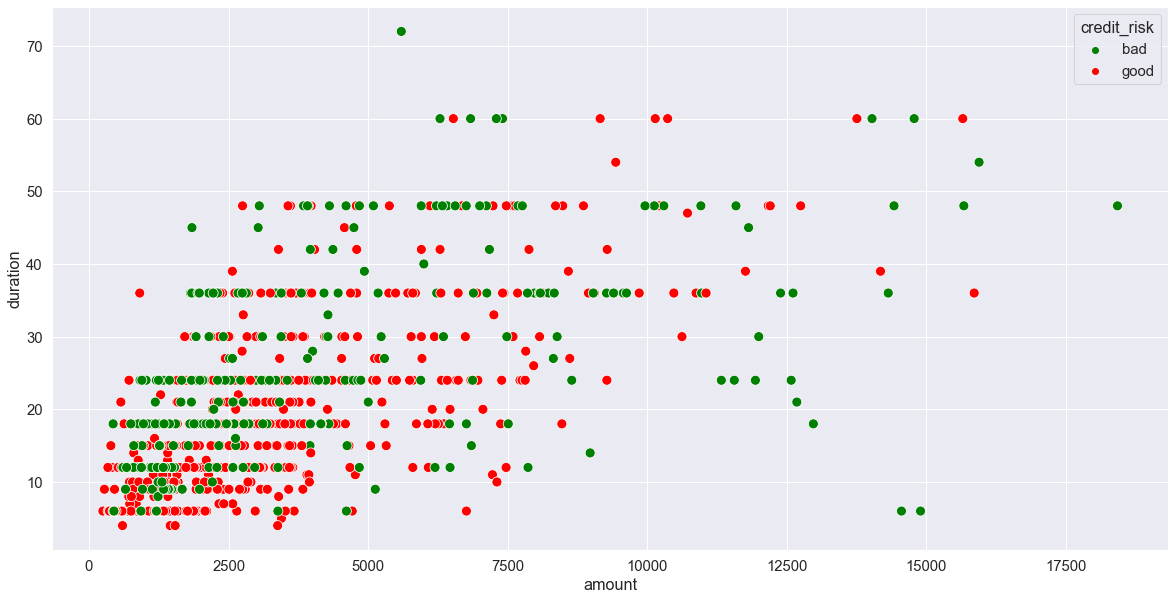

In [21]:
sns.scatterplot(data=df, x="amount", y="duration", hue="credit_risk", s=100, palette=['green', 'red'])
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['credit_risk_code'] = label.fit_transform(df['credit_risk'])
df['credit_risk_code'].loc[df['credit_risk_code'] == 0] = 'r'
df['credit_risk_code'].loc[df['credit_risk_code'] == 1] = 'g'

/Users/vakosta/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


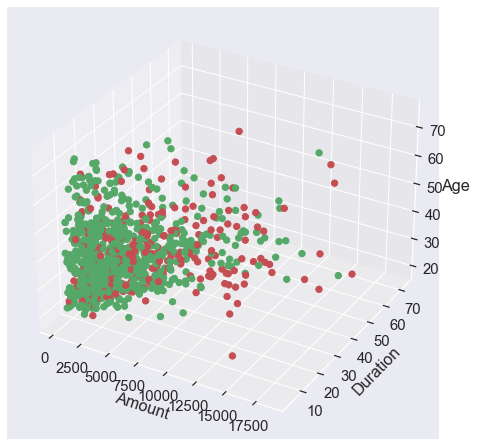

In [23]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df["amount"], df["duration"], df["age"], s=40, c=df["credit_risk_code"],
                marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

1. status — порядковый
1. duration — количественный
1. credit_history — номинальный
1. purpose — номинальный
1. amount — количественный
1. savings — порядковый
1. employment_duration — порядковый
1. installment_rate — порядковый
1. personal_status_sex — номинальный
1. other_debtors — номинальный
1. present_residence — порядковый
1. property — номинальный
1. age — количественный
1. other_installment_plans — номинальный
1. housing — номинальный
1. number_credits — номинальный
1. job — номинальный
1. people_liable — порядковый
1. telephone — бинарный
1. foreign_worker — бинарный
1. credit_risk — бинарный

In [24]:
label = LabelEncoder()

df['credit_risk'] = label.fit_transform(df['credit_risk'])
df['status'] = label.fit_transform(df['status'])
df['savings'] = label.fit_transform(df['savings'])
df['employment_duration'] = label.fit_transform(df['employment_duration'])
df['installment_rate'] = label.fit_transform(df['installment_rate'])
df['present_residence'] = label.fit_transform(df['present_residence'])
df['people_liable'] = label.fit_transform(df['people_liable'])
df['telephone'] = label.fit_transform(df['telephone'])
df['foreign_worker'] = label.fit_transform(df['foreign_worker'])
df['credit_risk'] = label.fit_transform(df['credit_risk'])

In [25]:
cols = ['credit_history', 'purpose', 'personal_status_sex',
                  'other_debtors', 'property', 'other_installment_plans',
                  'housing', 'number_credits', 'job']
df_categories = pd.get_dummies(df[cols], drop_first=True)
df.drop(cols + ['age_bin', 'credit_risk_code'], axis=1, inplace=True)
df = df.join(df_categories)

In [26]:
df.dtypes

status                                                        int64
duration                                                      int64
amount                                                        int64
savings                                                       int64
employment_duration                                           int64
installment_rate                                              int64
present_residence                                             int64
age                                                           int64
people_liable                                                 int64
telephone                                                     int64
foreign_worker                                                int64
credit_risk                                                   int64
credit_history_critical account/other credits elsewhere       uint8
credit_history_delay in paying off in the past                uint8
credit_history_existing credits paid back duly t

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [27]:
def predict(Xtest: np.array) -> np.array:
    result = np.array([])
    
    for i in Xtest:
        if int(i[2]) < 4000 and int(i[7]) > 25:
            result = np.append(result, 1)
        else:
            result = np.append(result, 0)
    
    return result

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

0.612